# **IMDB REVIEWS BINARY CLASSIFICATION**

This is a Binary classification model on IMDB reviews.

### **Contents**

1. Setup
2. Load the IMDB dataset
3. Decode reviews back to text
4. Multi-hot encoding of the integer sequences
5. Labels' vectorization
6. Set aside a validation data
7. Build the model
8. Compile the model
9. Train the model

>### **Setup**

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

> ### **Load the IMDB dataset**

In [48]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = 10000
)

print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


>### **Decode Reviews Back to Text**

In [49]:
word_index = imdb.get_word_index()

reverse_word_index = dict([
    (value, key) for (key, value) in word_index.items()
])

decoded_review = " ".join([
    reverse_word_index.get(i-3, "") for i in train_data[0]
])

decoded_review

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

## **Prepare the Data**

> ### **Multi-Hot Encoding of the integer sequences**

In [50]:
def seq_vectorizer(sequences, dimension=10000):
    """
    Converts a list of sequences (such as tokenized text or indices) into a 
    binary matrix representation, where each row corresponds to a sequence and
    each column corresponds to a specific index in the sequence's vocabulary.

    Parameters:
    sequences (list of lists): A list where each element is a sequence, and 
                               each sequence contains integers representing 
                               tokenized elements (e.g., word indices).
    dimension (int, optional): The size of the vocabulary space or maximum
                               index value expected in sequences. Default is 10,000.

    Returns:
    numpy.ndarray: A 2D binary matrix of shape (len(sequences), dimension), 
                   where each row is a one-hot encoded representation of the 
                   corresponding sequence.
                   Each entry in a row is set to 1 if the index corresponding 
                   to that entry exists in the sequence, otherwise 0.
    """
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        for j in seq:
            results[i, j] = 1.
    
    return results

x_train = seq_vectorizer(train_data)
x_test = seq_vectorizer(test_data)

In [51]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [52]:
train_labels[0]

1

> ### **Labels' Vectorization**

In [53]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_train[0]

1.0

> ### **Build the Model**

In [54]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

> ### **Compile the Model**

In [55]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

> ### **Set aside a validation data**

In [56]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

> ### **Train the Model**

In [57]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.7081 - loss: 0.5961 - val_accuracy: 0.8505 - val_loss: 0.4220
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8857 - loss: 0.3600 - val_accuracy: 0.8681 - val_loss: 0.3410
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9180 - loss: 0.2637 - val_accuracy: 0.8886 - val_loss: 0.2900
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9339 - loss: 0.2118 - val_accuracy: 0.8888 - val_loss: 0.2765
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9430 - loss: 0.1806 - val_accuracy: 0.8856 - val_loss: 0.2791
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9522 - loss: 0.1493 - val_accuracy: 0.8824 - val_loss: 0.2864
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9582 - loss: 0.1337 - val_accuracy: 0.8806 - val_loss: 0.2965
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9655 - loss: 0.1100 - val_accuracy: 0.8762 - v

In [58]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

> ### **Plot Training and Validation Loss**

C:\Users\agbad\AppData\Local\Temp\ipykernel_53208\2398681652.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(history_dict['loss'], 'bo', label='training loss', color='orange')


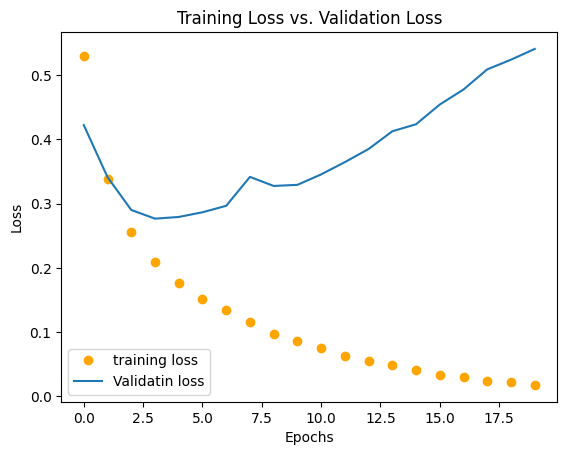

In [59]:
plt.plot(history_dict['loss'], 'bo', label='training loss', color='orange')
plt.plot(history_dict['val_loss'], label='Validatin loss')

plt.legend()
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

> ### **Plot Training and Validation Accuracy**

C:\Users\agbad\AppData\Local\Temp\ipykernel_53208\3615727450.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(history_dict['accuracy'], 'bo', label='training accuracy', color='orange')


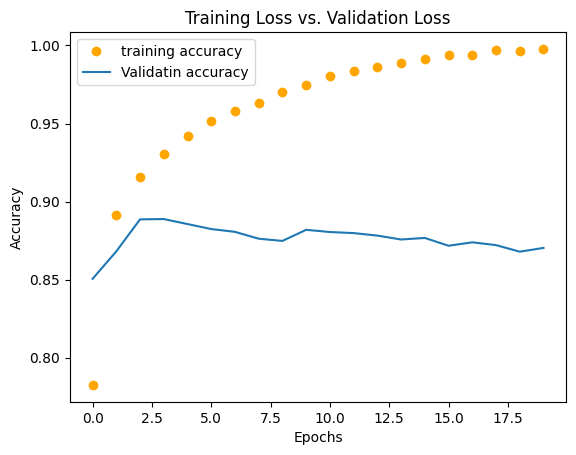

In [60]:
plt.plot(history_dict['accuracy'], 'bo', label='training accuracy', color='orange')
plt.plot(history_dict['val_accuracy'], label='Validatin accuracy')

plt.legend()
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

> ### **Modify Model's parameters**

In [70]:
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history1 = model1.fit(
    partial_x_train,
    partial_y_train,
    epochs = 40,
    batch_size = 500,
    validation_data = (x_val, y_val)
)

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6904 - loss: 0.5946 - val_accuracy: 0.8695 - val_loss: 0.3855
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8976 - loss: 0.3291 - val_accuracy: 0.8887 - val_loss: 0.3016
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9246 - loss: 0.2345 - val_accuracy: 0.8867 - val_loss: 0.2883
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9411 - loss: 0.1890 - val_accuracy: 0.8784 - val_loss: 0.3036
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9510 - loss: 0.1545 - val_accuracy: 0.8878 - val_loss: 0.2786
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9610 - loss: 0.1257 - val_accuracy: 0.8769 - val_loss: 0.3281
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9684 - loss: 0.1074 - val_accuracy: 0.8760 - val_loss: 0.3237
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9757 - loss: 0.0870 - val_accuracy: 0.8836 - v

C:\Users\agbad\AppData\Local\Temp\ipykernel_53208\2307418499.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(history1_dict['loss'], 'bo', color='green', label='Training loss')


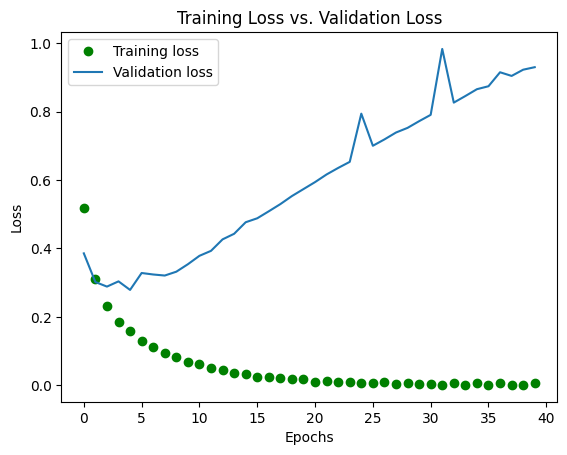

In [71]:
history1_dict = history1.history
history1_dict.keys()

plt.plot(history1_dict['loss'], 'bo', color='green', label='Training loss')
plt.plot(history1_dict['val_loss'], label='Validation loss')

plt.legend()
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

C:\Users\agbad\AppData\Local\Temp\ipykernel_53208\2944737619.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(history1_dict['accuracy'], 'bo', label='training accuracy', color='orange')


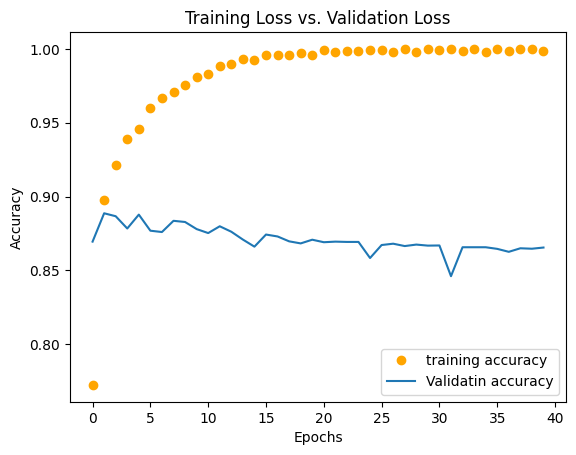

In [72]:
plt.plot(history1_dict['accuracy'], 'bo', label='training accuracy', color='orange')
plt.plot(history1_dict['val_accuracy'], label='Validatin accuracy')

plt.legend()
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()